In [ ]:
import math
from datetime import datetime, timedelta
%pip install cdsapi
%pip install netcdf4
import cdsapi
import xarray as xr
import pandas as pd
!pip install pvlib




FileNotFoundError: [Errno 2] No such file or directory: 'temperature_and_irradiance.ipynb'

In [ ]:
dataset = "cams-gridded-solar-radiation"
request = {
    "variable": [
        "global_horizontal_irradiation",
        "direct_horizontal_irradiation",
        "diffuse_horizontal_irradiation",
        "direct_normal_irradiation"
    ],
    "sky_type": ["clear"],
    "version": ["4.5"],
    "year": ["2011"],
    "month": ["04"],
    "area": [-21, -42, -24, -39]
}

client = cdsapi.Client(url='https://ads.atmosphere.copernicus.eu/api', key='83dbd0a2-6dc2-4406-ba2f-ebb558e108f6', verify=False)
client.retrieve(dataset, request).download()


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
2026-01-14 14:00:15,514 INFO

45056bb3cc65cedc862a9993ad23077.zip:   0%|          | 0.00/3.57M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'object-store.os-api.cci2.ecmwf.int'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'45056bb3cc65cedc862a9993ad23077.zip'

In [ ]:
dataset = "cams-global-reanalysis-eac4-monthly"
request = {
    "variable": ["2m_temperature"],
    "year": ["2011"],
    "month": ["01"],
    "product_type": ["monthly_mean"],
    "data_format": "grib",
    "area": [90, -180, -90, 180]
}


client = cdsapi.Client(url='https://ads.atmosphere.copernicus.eu/api', key='83dbd0a2-6dc2-4406-ba2f-ebb558e108f6', verify=False)
client.retrieve(dataset, request).download()

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
2026-01-14 14:00:49,827 INFO

85e38eb020bcac923367d7a3ecd54fb4.grib:   0%|          | 0.00/226k [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'object-store.os-api.cci2.ecmwf.int'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'85e38eb020bcac923367d7a3ecd54fb4.grib'

In [ ]:
import xarray as xr
!pip install xarray cfgrib eccodes pandas
ds = xr.open_dataset(
    '85e38eb020bcac923367d7a3ecd54fb4.grib',
    engine='cfgrib')
df_temperature = ds.to_dataframe()
df_temperature.to_csv('output_temperature.csv', index=True)


In [ ]:
df_temperature

number       time   step  surface valid_time         t2m
latitude longitude                                                          
 90.0    -180.00         0 2011-01-01 0 days      0.0 2011-01-01  246.104004
         -179.25         0 2011-01-01 0 days      0.0 2011-01-01  246.104004
         -178.50         0 2011-01-01 0 days      0.0 2011-01-01  246.104004
         -177.75         0 2011-01-01 0 days      0.0 2011-01-01  246.104004
         -177.00         0 2011-01-01 0 days      0.0 2011-01-01  246.104004
...                    ...        ...    ...      ...        ...         ...
-90.0     176.25         0 2011-01-01 0 days      0.0 2011-01-01  246.885254
          177.00         0 2011-01-01 0 days      0.0 2011-01-01  246.885254
          177.75         0 2011-01-01 0 days      0.0 2011-01-01  246.885254
          178.50         0 2011-01-01 0 days      0.0 2011-01-01  246.885254
          179.25         0 2011-01-01 0 days      0.0 2011-01-01  246.885254

[115680 rows x 6 columns]

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.3 MB/s eta 0:00:00


In [ ]:
# Carrega o arquivo NetCDF usando xarray
ds_BHI = xr.open_dataset('v4.5_BHI_clear_2011_01.area-subset.-21.-39.-24.-42.nc', engine='h5netcdf')
ds_BNI = xr.open_dataset('v4.5_BNI_clear_2011_01.area-subset.-21.-39.-24.-42.nc', engine='h5netcdf')
ds_DHI = xr.open_dataset('v4.5_DHI_clear_2011_01.area-subset.-21.-39.-24.-42.nc', engine='h5netcdf')
ds_GHI = xr.open_dataset('v4.5_GHI_clear_2011_01.area-subset.-21.-39.-24.-42.nc', engine='h5netcdf')

df_converted_BHI = ds_BHI.to_dataframe()
df_converted_BNI = ds_BNI.to_dataframe()
df_converted_DHI = ds_DHI.to_dataframe()
df_converted_GHI = ds_GHI.to_dataframe()
df_combined = pd.concat([df_converted_BHI, df_converted_BNI, df_converted_DHI, df_converted_GHI], axis=1)
df_combined.columns = ['BHI', 'BNI', 'DHI', 'GHI']

df_combined.to_csv('output_data_irradiance.csv', index=True)
print('Dataset converted to DataFrame and saved to output_datall.csv')

Dataset converted to DataFrame and saved to output_datall.csv


Code: merge temperature into irradiance (nearest lat/lon + optional time)

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

# ----------------------------
# Files
# ----------------------------
irr_path  = "output_data_irradiance.csv"
temp_path = "output_temperature.csv"
out_path  = "irradiance_with_temperature.csv"

# ----------------------------
# Load
# ----------------------------
irr = pd.read_csv(irr_path)
tmp = pd.read_csv(temp_path)

# Parse time columns
irr["time"] = pd.to_datetime(irr["time"])

# Temperature time column: prefers "valid_time" if present, else "time"
tmp_time_col = "valid_time" if "valid_time" in tmp.columns else ("time" if "time" in tmp.columns else None)
if tmp_time_col is not None:
    tmp[tmp_time_col] = pd.to_datetime(tmp[tmp_time_col])

# Temperature variable name (common: "t" in Kelvin for ERA5)
# If your file has another name, change here:
temp_var = "t"
if temp_var not in tmp.columns:
    raise ValueError(f"Temperature column '{temp_var}' not found. Available columns: {list(tmp.columns)}")

# Convert Kelvin -> Celsius (comment out if already °C)
tmp["T_air_C"] = tmp[temp_var] - 273.15

# If the temperature file has pressure levels, choose one (edit if needed)
if "isobaricInhPa" in tmp.columns:
    # Example: keep only 850 hPa (as in many ERA5 pressure-level exports)
    tmp = tmp[tmp["isobaricInhPa"] == 850].copy()

# ----------------------------
# Crop temperature to irradiance region (+padding) for speed
# ----------------------------
pad = 2.0  # degrees
lat_min, lat_max = irr["latitude"].min(), irr["latitude"].max()
lon_min, lon_max = irr["longitude"].min(), irr["longitude"].max()

tmp = tmp[
    tmp["latitude"].between(lat_min - pad, lat_max + pad) &
    tmp["longitude"].between(lon_min - pad, lon_max + pad)
].copy()

# ----------------------------
# Helper: assign temperature by nearest spatial point for one "tmp field"
# ----------------------------
def assign_temp_by_kdtree(irr_part: pd.DataFrame, tmp_field: pd.DataFrame) -> pd.DataFrame:
    """
    irr_part: rows of irradiance with columns latitude, longitude
    tmp_field: temperature field with columns latitude, longitude, T_air_C
    Returns irr_part with new column 'T_air_C'
    """
    tmp_xy = np.column_stack([tmp_field["latitude"].to_numpy(), tmp_field["longitude"].to_numpy()])
    tree = cKDTree(tmp_xy)

    irr_xy = np.column_stack([irr_part["latitude"].to_numpy(), irr_part["longitude"].to_numpy()])
    dist, idx = tree.query(irr_xy, k=1)

    irr_part = irr_part.copy()
    irr_part["T_air_C"] = tmp_field["T_air_C"].to_numpy()[idx]
    irr_part["temp_nn_distance_deg"] = dist  # optional QA
    return irr_part

# ----------------------------
# Case A: temperature has NO time (or only one time) -> simplest
# ----------------------------
if tmp_time_col is None or tmp[tmp_time_col].nunique() == 1:
    tmp_field = tmp[["latitude", "longitude", "T_air_C"]].drop_duplicates()
    irr_out = assign_temp_by_kdtree(irr, tmp_field)

# ----------------------------
# Case B: temperature has multiple times -> match by time AND nearest lat/lon
# (efficient: loop over times, avoids giant merge)
# ----------------------------
else:
    # We will match each irradiance timestamp to the nearest available temperature timestamp.
    # (If they are exactly the same, perfect; if not, nearest is typical for reanalysis grids.)
    tmp_times = np.sort(tmp[tmp_time_col].unique())

    # Precompute mapping from irr times -> nearest tmp time
    irr_times = irr["time"].unique()
    # Convert datetime64 -> int ns for vectorized nearest
    tmp_ns = tmp_times.astype("datetime64[ns]").astype("int64")
    irr_ns = irr_times.astype("datetime64[ns]").astype("int64")

    # Find nearest temp time index for each irr time
    # (uses searchsorted on sorted arrays)
    pos = np.searchsorted(tmp_ns, irr_ns)
    pos = np.clip(pos, 1, len(tmp_ns) - 1)
    left = tmp_ns[pos - 1]
    right = tmp_ns[pos]
    choose_right = (np.abs(irr_ns - left) > np.abs(right - irr_ns))
    nearest_idx = pos.copy()
    nearest_idx[~choose_right] = pos[~choose_right] - 1
    irr_to_tmp_time = dict(zip(irr_times, tmp_times[nearest_idx]))

    # Apply mapping
    irr2 = irr.copy()
    irr2["tmp_time_match"] = irr2["time"].map(irr_to_tmp_time)

    pieces = []
    for tmatch, irr_part in irr2.groupby("tmp_time_match", sort=False):
        tmp_field = tmp[tmp[tmp_time_col] == tmatch][["latitude", "longitude", "T_air_C"]].drop_duplicates()
        pieces.append(assign_temp_by_kdtree(irr_part.drop(columns=["tmp_time_match"]), tmp_field))

    irr_out = pd.concat(pieces, ignore_index=True)

# ----------------------------
# Save
# ----------------------------
#df_temperatureirradiance.to_csv('output_data_temperature_irradiance.csv', index=True)
#irr_out.to_csv(out_path, index=False)
#print("Saved:", out_path)
df_temperature_irradiance=(irr_out[["time", "latitude", "longitude", "GHI", "T_air_C"]].head())
df_combined.to_csv('output_data_temperature_irradiance.csv', index=True)

ValueError: Temperature column 't' not found. Available columns: ['latitude', 'longitude', 'number', 'time', 'step', 'surface', 'valid_time', 't2m']

In [ ]:
df_temperature_irradiance

,time,latitude,longitude,GHI,T_air_C
0,2011-01-01 00:15:00,-21.05,-41.95,0.0,18.33474
1,2011-01-01 00:15:00,-21.05,-41.85,0.0,18.33474
2,2011-01-01 00:15:00,-21.05,-41.75,0.0,18.33474
3,2011-01-01 00:15:00,-21.05,-41.65,0.0,18.33474
4,2011-01-01 00:15:00,-21.05,-41.55,0.0,18.15994


In [ ]:
df_combined

BHI  BNI  DHI  GHI
time                latitude   longitude                     
2011-01-01 00:15:00 -21.049999 -41.950001  0.0  0.0  0.0  0.0
                               -41.849998  0.0  0.0  0.0  0.0
                               -41.750000  0.0  0.0  0.0  0.0
                               -41.650002  0.0  0.0  0.0  0.0
                               -41.549999  0.0  0.0  0.0  0.0
...                                        ...  ...  ...  ...
2011-02-01 00:00:00 -23.950001 -39.450001  NaN  NaN  NaN  NaN
                               -39.349998  NaN  NaN  NaN  NaN
                               -39.250000  NaN  NaN  NaN  NaN
                               -39.150002  NaN  NaN  NaN  NaN
                               -39.049999  NaN  NaN  NaN  NaN

[2678400 rows x 4 columns]

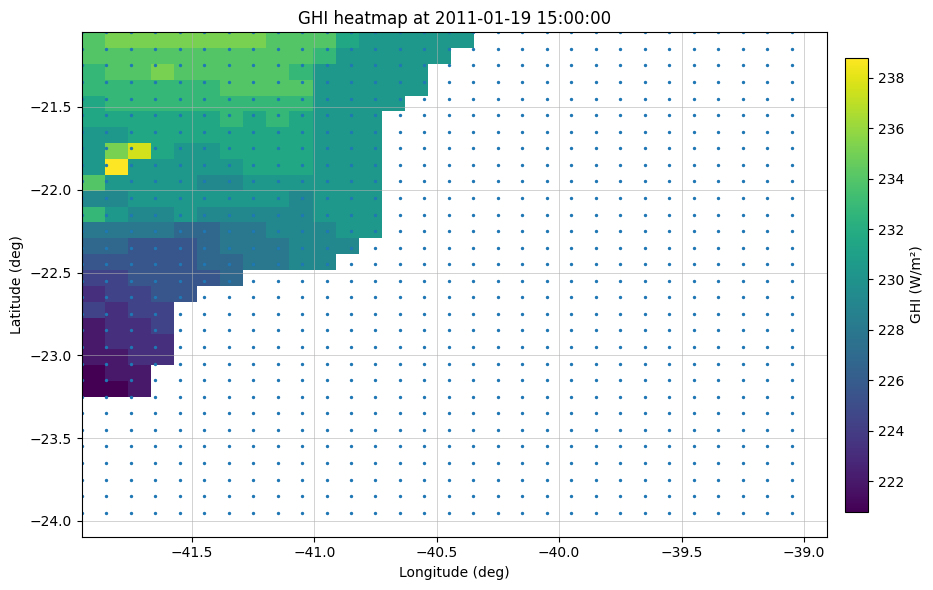

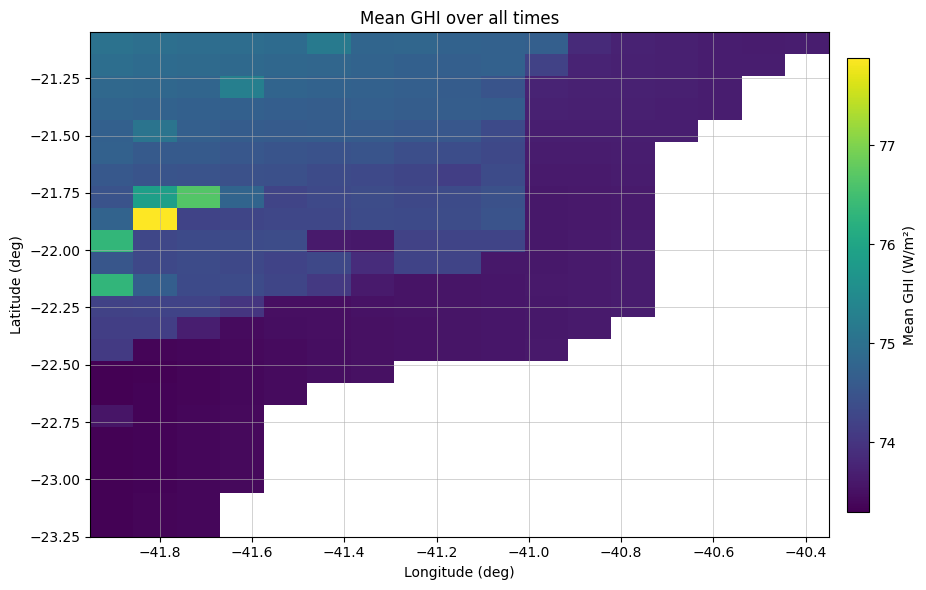

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = "output_data_irradiance.csv"
df = pd.read_csv(path)

# Choose which irradiance variable to plot: "GHI", "DHI", "BNI", "BHI"
var = "GHI"

# --- 1) A nice single-time map (auto-picks the time with highest mean irradiance) ---
best_time = df.groupby("time", sort=False)[var].mean().idxmax()
d = df[df["time"] == best_time].copy()

grid = (
    d.pivot_table(index="latitude", columns="longitude", values=var, aggfunc="mean")
     .sort_index()
)

lats = grid.index.to_numpy()
lons = grid.columns.to_numpy()
Z = grid.to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    Z,
    origin="lower",
    extent=[float(lons.min()), float(lons.max()), float(lats.min()), float(lats.max())],
    aspect="auto"
)
cb = plt.colorbar(im, ax=ax, pad=0.02, shrink=0.9)
cb.set_label(f"{var} (W/m²)")

# optional: overlay the grid points
ax.scatter(d["longitude"], d["latitude"], s=2)

ax.set_title(f"{var} heatmap at {best_time}")
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.grid(True, linewidth=0.4)
plt.tight_layout()
plt.show()


# --- 2) Mean map over the whole dataset ---
mean_grid = (
    df.groupby(["latitude", "longitude"], as_index=False)[var].mean()
      .pivot_table(index="latitude", columns="longitude", values=var)
      .sort_index()
)

lats = mean_grid.index.to_numpy()
lons = mean_grid.columns.to_numpy()
Z = mean_grid.to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    Z,
    origin="lower",
    extent=[float(lons.min()), float(lons.max()), float(lats.min()), float(lats.max())],
    aspect="auto"
)
cb = plt.colorbar(im, ax=ax, pad=0.02, shrink=0.9)
cb.set_label(f"Mean {var} (W/m²)")

ax.set_title(f"Mean {var} over all times")
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.grid(True, linewidth=0.4)
plt.tight_layout()
plt.show()


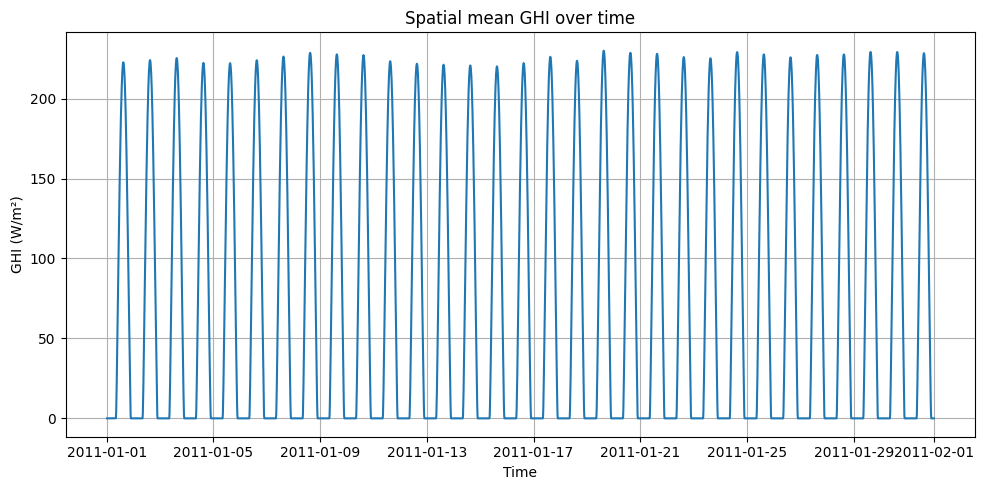

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("output_data_irradiance.csv")

# Parse time
df["time"] = pd.to_datetime(df["time"])

# Choose irradiance variable
var = "GHI"   # can be: "GHI", "DHI", "BNI", "BHI"

# Spatial mean over the domain
ts_mean = df.groupby("time")[var].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(ts_mean.index, ts_mean.values)
plt.xlabel("Time")
plt.ylabel(f"{var} (W/m²)")
plt.title(f"Spatial mean {var} over time")
plt.grid(True)

plt.tight_layout()
plt.show()


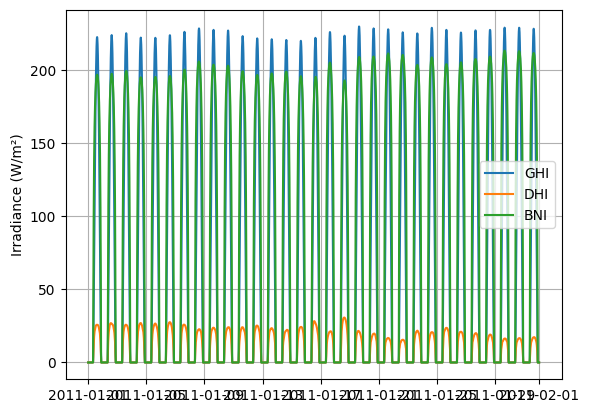

In [ ]:
for v in ["GHI", "DHI", "BNI"]:
    plt.plot(df.groupby("time")[v].mean(), label=v)

plt.legend()
plt.ylabel("Irradiance (W/m²)")
plt.grid(True)
plt.show()




In [ ]:
!pip install pvlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 50.5 MB/s eta 0:00:00
